In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
from torch.utils.data import Dataset, DataLoader
from torch.nn import TransformerEncoder, TransformerEncoderLayer

# Set random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

# Load and preprocess the data
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
ages = df.iloc[:, 12:13].values
times = df.iloc[:, 11:12].values

scaler = MinMaxScaler()
ages_scaled = scaler.fit_transform(ages)
times_scaled = scaler.fit_transform(times)

# Convert data to PyTorch tensors
ages_tensor = torch.tensor(ages_scaled, dtype=torch.float32)
times_tensor = torch.tensor(times_scaled, dtype=torch.float32)

# Define the Transformer model
class TransformerModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout, num_heads):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_size, hidden_size)
        self.transformer_encoder_layer = TransformerEncoderLayer(hidden_size, num_heads, dim_feedforward=hidden_size, dropout=dropout)
        self.transformer_encoder = TransformerEncoder(self.transformer_encoder_layer, num_layers)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, src):
        src = self.embedding(src)
        src = src.permute(1, 0, 2)
        output = self.transformer_encoder(src)
        output = output.permute(1, 0, 2)
        output = self.fc(output)
        return output.squeeze(2)

# Define hyperparameters
input_size = 1
hidden_size = 32
num_layers = 2
dropout = 0.1
num_heads = 4
learning_rate = 0.001
num_epochs = 10
batch_size = 32

# Create the Transformer model
model = TransformerModel(input_size, hidden_size, num_layers, dropout, num_heads)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Create dataset and dataloader
class HeartFailureDataset(Dataset):
    def __init__(self, ages, times):
        self.ages = ages
        self.times = times

    def __getitem__(self, index):
        age = self.ages[index]
        time = self.times[index]
        return age, time

    def __len__(self):
        return len(self.ages)

dataset = HeartFailureDataset(ages_tensor, times_tensor)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Train the Transformer model
model.train()
for epoch in range(num_epochs):
    total_loss = 0

    for batch_age, batch_time in dataloader:
        optimizer.zero_grad()

        # Forward pass
        output = model(batch_age.unsqueeze(2))

        # Calculate loss
        loss = criterion(output, batch_time)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Print epoch loss
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(dataloader)}")

    
ages = df.iloc[:, 12:13]
times = df.iloc[:, 11:12]
age = ages.to_numpy().flatten()
time = times.to_numpy().flatten()

# Calculate the age-wise sum
age_wise_sum = {}
for i in range(len(age)):
    if age[i] not in age_wise_sum:
        age_wise_sum[age[i]] = 0
    age_wise_sum[age[i]] += time[i]

# Calculate the age-wise sum
age_wise_sum = {}
for i in range(len(age)):
    if age[i] not in age_wise_sum:
        age_wise_sum[age[i]] = 0
    age_wise_sum[age[i]] += 1  # Increment the count instead of time

# Prepare the data for plotting
age_values = sorted(age_wise_sum.keys())
heart_failure_counts = [age_wise_sum[age] for age in age_values]



## Generate the 'all_age' variable
all_age = np.arange(min(age), max(age) + 1)

# Convert 'all_age' to a tensor and make predictions
all_age_tensor = torch.FloatTensor(all_age).unsqueeze(1).unsqueeze(2)
with torch.no_grad():
    predicted_times = model(all_age_tensor).squeeze().numpy()

# Inverse transform the predicted values
predicted_times = scaler.inverse_transform(predicted_times.reshape(-1, 1)).flatten()




C:\Users\ersha\anaconda3\lib\site-packages\torch\nn\modules\transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/10, Loss: 0.12061182633042336
Epoch 2/10, Loss: 0.07415528781712055
Epoch 3/10, Loss: 0.0641129720956087
Epoch 4/10, Loss: 0.07030412554740906
Epoch 5/10, Loss: 0.06606977283954621
Epoch 6/10, Loss: 0.058581069484353064
Epoch 7/10, Loss: 0.06287962086498737
Epoch 8/10, Loss: 0.06300639137625694
Epoch 9/10, Loss: 0.05742625780403614
Epoch 10/10, Loss: 0.06252612881362438


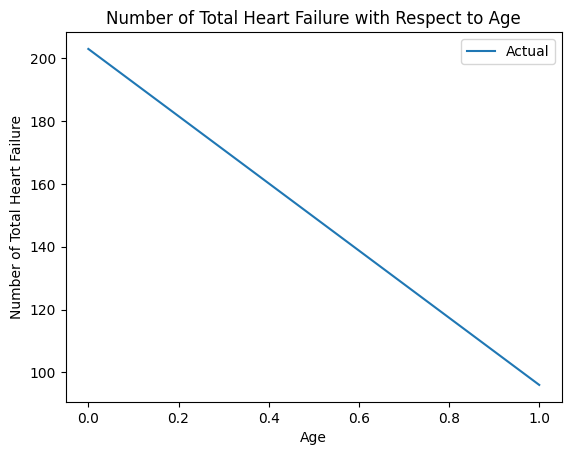

In [2]:
# Plot the graph
plt.plot(age_values, heart_failure_counts, label="Actual")
#plt.plot(all_age, predicted_times, label="Predicted")
plt.title("Number of Total Heart Failure with Respect to Age")
plt.xlabel("Age")
plt.ylabel("Number of Total Heart Failure")
plt.legend()
plt.show()


In [2]:
pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr